In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
from pandas import DataFrame
import gc

from IPython.display import Image
from IPython.core.display import HTML

from scipy.sparse import csr_matrix

%matplotlib inline 

import os
print(os.listdir("../input"))


['test.json', 'validation.json', 'train.json']


In [6]:
with open("../input/train.json") as datafile1: #first check if it's a valid json file or not
    train_data = json.load(datafile1)
with open("../input/test.json") as datafile2: #first check if it's a valid json file or not
    test_data = json.load(datafile2)
with open("../input/validation.json") as datafile3: #first check if it's a valid json file or not
    valid_data = json.load(datafile3)

In [7]:
print("####" * 10)
print("## Training Data.")
print(train_data.keys())
print(train_data["info"])
print(train_data["license"])
print(len(train_data["images"]))
print(len(train_data["annotations"]))
print(train_data["images"][:10])
print(train_data["annotations"][:10])

print("\n\n")
print("####" * 10)
print("## Validation Data.")
print(valid_data.keys())
print(len(valid_data["images"]))
print(len(valid_data["annotations"]))
print(valid_data["images"][:10])
print(valid_data["annotations"][:10])

print("\n\n")
print("####" * 10)
print("## Test Data.")
print(test_data.keys())
print(len(test_data["images"]))
print(test_data["images"][:10])

#print(train_data["images"])

########################################
## Training Data.
dict_keys(['info', 'images', 'annotations', 'license'])
{'url': 'https://www.wish.com', 'dateCreated': '2-27-2018', 'version': '2', 'description': 'Train Set for FGVC5 CVPR 2018 by https://www.wish.com', 'year': '2018'}
{'url': 'http://creativecommons.org/licenses/by-nc/4.0/', 'name': 'Attribution-NonCommercial License', 'id': '3'}
1014544
1014544
[{'url': 'https://contestimg.wish.com/api/webimage/570f35feb2f4b95d223aa9b1-large', 'imageId': '1'}, {'url': 'https://contestimg.wish.com/api/webimage/5468f1c0d96b290ff8e5c805-large', 'imageId': '2'}, {'url': 'https://contestimg.wish.com/api/webimage/546410237d57f323e72ca414-large', 'imageId': '3'}, {'url': 'https://contestimg.wish.com/api/webimage/550b955fdd699c1a0351f84e-large', 'imageId': '4'}, {'url': 'https://contestimg.wish.com/api/webimage/54451f33355b4e0fd3028a30-large', 'imageId': '5'}, {'url': 'https://contestimg.wish.com/api/webimage/571e0b1cea3cc75d8a004f37-large', 'imageI

In [8]:
train_imgs_df = pd.DataFrame.from_records(train_data["images"])
train_imgs_df["url"] = train_imgs_df["url"]
train_labels_df = pd.DataFrame.from_records(train_data["annotations"])
#train_labels_df = train_labels_df["labelId"].apply(lambda x: [int(i) for i in x])
train_df = pd.merge(train_imgs_df,train_labels_df,on="imageId",how="outer")
train_df["imageId"] = train_df["imageId"].astype(np.int)
print(train_df.head())
print(train_df.dtypes)

valid_imgs_df = pd.DataFrame.from_records(valid_data["images"])
valid_imgs_df["url"] = valid_imgs_df["url"]
valid_labels_df = pd.DataFrame.from_records(valid_data["annotations"])
#valid_labels_df = valid_labels_df["labelId"].apply(lambda x: [int(i) for i in x])
valid_df = pd.merge(valid_imgs_df,valid_labels_df,on="imageId",how="outer")
valid_df["imageId"] = valid_df["imageId"].astype(np.int)
print(valid_df.head())
print(valid_df.dtypes)

test_df = pd.DataFrame.from_records(test_data["images"])
test_df["url"] = test_df["url"]
test_df["imageId"] = test_df["imageId"].astype(np.int)
print(test_df.head())
print(test_df.dtypes)

   imageId                                                url  \
0        1  https://contestimg.wish.com/api/webimage/570f3...   
1        2  https://contestimg.wish.com/api/webimage/5468f...   
2        3  https://contestimg.wish.com/api/webimage/54641...   
3        4  https://contestimg.wish.com/api/webimage/550b9...   
4        5  https://contestimg.wish.com/api/webimage/54451...   

                                       labelId  
0                        [95, 66, 137, 70, 20]  
1                  [36, 66, 44, 214, 105, 133]  
2                 [170, 66, 97, 153, 105, 138]  
3                       [18, 66, 44, 153, 164]  
4  [189, 66, 176, 137, 153, 74, 181, 171, 138]  
imageId     int64
url        object
labelId    object
dtype: object
   imageId                                                url  \
0        1  https://contestimg.wish.com/api/webimage/568e1...   
1        2  https://contestimg.wish.com/api/webimage/5452f...   
2        3  https://contestimg.wish.com/api/webimage

In [9]:
del train_data
del valid_data
del test_data
gc.collect()

60

In [10]:
print("####" * 10)
print("## Training Data.")
print(train_df.isna().any())

print("\n\n")
print("####" * 10)
print("## Validation Data.")
print(valid_df.isna().any())

print("\n\n")
print("####" * 10)
print("## Testing Data.")
print(test_df.isna().any())

########################################
## Training Data.
imageId    False
url        False
labelId    False
dtype: bool



########################################
## Validation Data.
imageId    False
url        False
labelId    False
dtype: bool



########################################
## Testing Data.
imageId    False
url        False
dtype: bool


In [11]:
train_image_arr = train_df[["imageId","labelId"]].apply(lambda x: [(x["imageId"],int(i)) for i in x["labelId"]], axis=1).tolist()
train_image_arr = [item for sublist in train_image_arr for item in sublist]
train_image_row = np.array([d[0] for d in train_image_arr]).astype(np.int)
train_image_col = np.array([d[1] for d in train_image_arr]).astype(np.int)
train_image_vals = np.ones(len(train_image_col))
train_image_mat = csr_matrix((train_image_vals, (train_image_row, train_image_col)))
print(train_image_mat.shape)

(1014545, 229)


In [12]:
labels = train_image_mat.sum(0).astype(np.int)
print(labels)

[[     0     79  21754   2906   5249   4837   4761  27220   2264  10282
    2853   5966   1221   7993  12570  10287     23 251869  38978 126335
  105359   3690   1218    328    286   8090   9140    903  15901    717
    5061   3505  12659   3968   3093   3657  62147  10178   9231   4405
    6666     68   4884   3998  75053   2827     71  10509   8484  68298
     910  10064   8782 142948   2626   9861   8175   2362   3070  39890
    3668  26023 126473  20870   5621  12476 743250   1622    337   9215
   48383   8113   8976  34794  11583   5833    202   6445  44779  57464
    2503   6940   9024    299     52    923     69  21073  22065   3525
    1096  34024   8846   9502    364  18273   3150  30626  88828  16475
   20751  11434   5832   8493    187 330864 193283     66    190   8083
   28890   5524   1119  78011   9841  23805  57654  14638   3915    754
    4316   6273  30991    573    392    944   4345   3755  30459    939
    3766  50905   7878  61088    925  11210   9311 104064 102957

Text(0.5,1,'Distribution of labels')

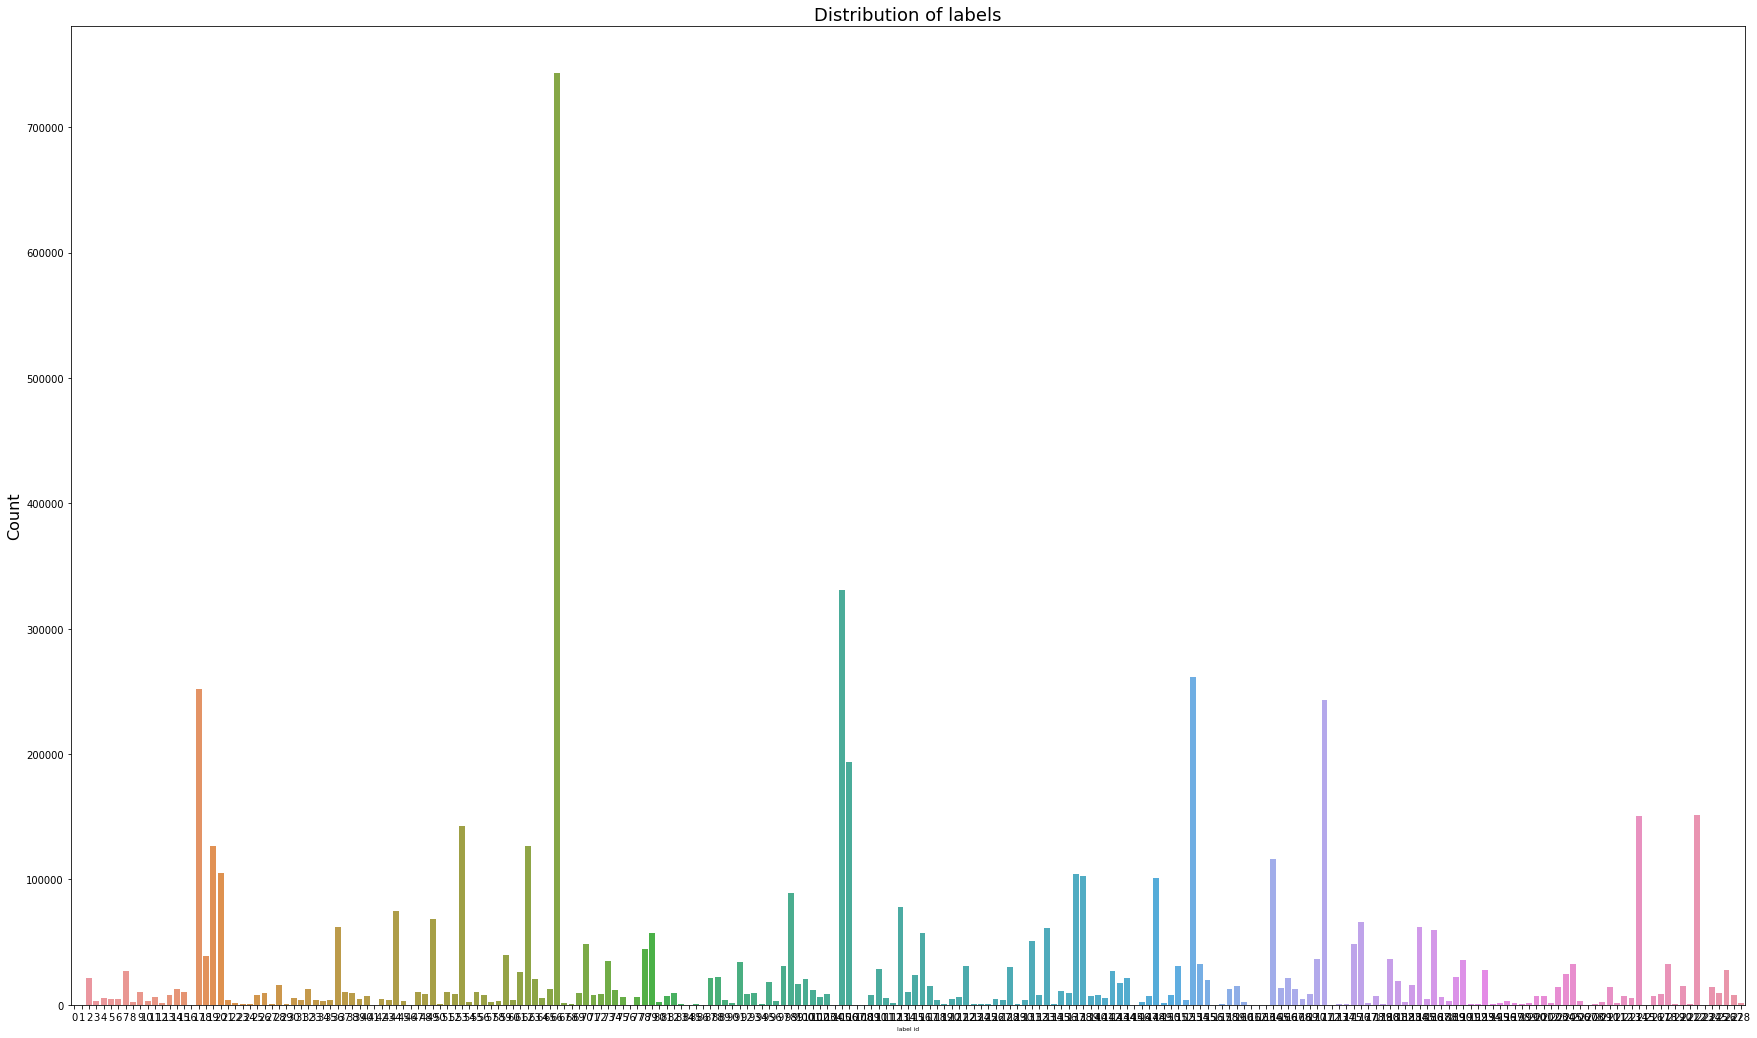

In [13]:
## Class distribution.
plt.figure(figsize=(30,18))
labels_inds = np.arange(len(labels.tolist()[0]))
sns.barplot(labels_inds,  labels.tolist()[0])
plt.xlabel('label id', fontsize=6)
plt.ylabel('Count', fontsize=16)
plt.title("Distribution of labels", fontsize=18)

In [14]:
def display_label(label_id, label_mat, df, num_disp=8):
    data_col = train_image_mat.getcol(label_id)
    tar_col = np.random.choice(np.where(data_col.toarray() == 1.0)[0],size=num_disp).tolist()
    urls = df[df["imageId"].isin(tar_col)]["url"].tolist()
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for u in urls])
    header_str = "<h2>Label {:d}</h2>".format(label_id)
    display(HTML(header_str))
    display(HTML(images_list))

In [18]:
for label in range(1,train_image_mat.shape[1]):
    display_label(label, train_image_mat, train_df,10)